<h5>Ali Morajjabi - 610300104</h5>

<hr>

<h3 style="color:#07ff00">Gradient Method</h3>

In [164]:
import numpy as np
import matplotlib.pyplot as plt

In [24]:
def grad_calculator(coeff, x):
    return np.array((2*coeff[0]*x[0], 2*coeff[1]*x[1]))

In [29]:
# a*x**2 + b*y**2
def f(coeff, x):
    return coeff[0]*x[0]**2 + coeff[1]*x[1]**2

This function implements gradient descent with backtracking line search to minimize function f

<strong>coeffs:</strong> Coefficients of the function 𝑓
<br>
<strong>x_0: </strong>Initial guess for the parameters.
<br>
<strong>s:</strong> Initial step size.
<br>
<strong>beta:</strong> Step size reduction factor.
<br>
<strong>alpha:</strong> Armijo rule parameter.
<br>
<strong>tolerance:</strong> Gradient norm threshold for convergence.
<br>

<hr>

<h5 style="color:#00ffc0">Algorithm:</h5>
<p>
<strong>Initialization</strong> Set iteration counter iter to 0.
<br><br>
<strong>Convergence Check:</strong> Continue if the gradient norm is above the tolerance.
<br><br>
<strong>Backtracking Line Search:</strong>
<br><br>
    +Initialize i_k to 0.
<br>
    +2.Compute the gradient at the current 𝑥0
​<br>
    +3.Update 𝑥0 using decreasing step sizes until the Armijo condition is satisfied.
<br><br>
<strong>Update:</strong> Set 𝑥0 to the new point 𝑥1
​<br><br>
<strong>Iteration:</strong> Increment the iteration counter.
<br>
The function returns the optimized parameters and the number of iterations taken to converge.
</p>

In [152]:
def grad_BT(coeffs, x_0, s, beta, alpha, tolerance):
    iter = 0
    while (np.linalg.norm(grad_calculator(coeffs, x_0)) >= tolerance):
        
        i_k = 0
        while (True):
            grad = grad_calculator(coeffs, x_0)
            x_1 = x_0 - (s* beta**i_k) * grad
            if (f(coeffs, x_0) - f(coeffs, x_1) >= (alpha*s*(beta**i_k))*(np.linalg.norm(grad)**2)):
                break
            i_k += 1
        
        x_0 = x_1

        # print(f"x{iter+1}: ", x_0)

        iter += 1

    return (np.array(x_0), iter)

1. **Step Size (\( S \))**:
   - **Role**: It represents the initial step size for the update in the optimization algorithm.
   - **Effect of Increasing**: A larger initial step size may potentially lead to faster convergence if it is not too large, but it also increases the risk of overshooting the minimum, resulting in the need for more backtracking iterations.
   - **Effect of Decreasing**: A smaller initial step size may lead to more conservative updates, which can increase the number of iterations needed to reach an optimal solution but may reduce the number of backtracking steps.

2. **Reduction Factor (\( BETA \))**:
   - **Role**: This is the factor by which the step size is multiplied in each iteration of the backtracking process (typically \( 0 < BETA < 1 \)).
   - **Effect of Increasing**: If \( BETA \) is closer to 1, the reduction in step size is less aggressive, which can lead to fewer backtracking iterations but might require a more precise initial step size.
   - **Effect of Decreasing**: A smaller \( BETA \) (closer to 0) results in a more aggressive reduction of the step size, potentially leading to more iterations of backtracking but ensuring a more cautious approach to finding a suitable step size.

3. **Condition Parameter (\( ALPHA \))**:
   - **Role**: This parameter (usually \( 0 < ALPHA < 0.5 \)) controls the strictness of the Armijo condition (sufficient decrease condition). It dictates the required decrease in the objective function to accept the current step size.
   - **Effect of Increasing**: A larger \( ALPHA \) value makes the sufficient decrease condition stricter, which can lead to more backtracking iterations as it requires a more significant decrease in the objective function.
   - **Effect of Decreasing**: A smaller \( ALPHA \) makes the condition less strict, which may reduce the number of backtracking steps but can increase the risk of accepting step sizes that do not sufficiently decrease the objective function, potentially leading to slower overall convergence.

In [201]:
COEFFS = (10, 0.1)
X_0 = (3, 5)
S = 2
ALPHA = 0.25
BETA = 0.4
TOLERANCE = 0.00001

In [202]:
ans, iter = grad_BT(COEFFS, X_0, S, BETA, ALPHA, TOLERANCE)
print(ans, f"number of iterations: {iter}", sep="\n")

[4.99467657e-08 4.65858781e-05]
number of iterations: 58


In [168]:
the_range = np.arange(0.001, 1.001, 0.001)
l = list()
for y_co in the_range:
    l.append(grad_BT((1, y_co), (1, 2), S, BETA, ALPHA, TOLERANCE)[1])

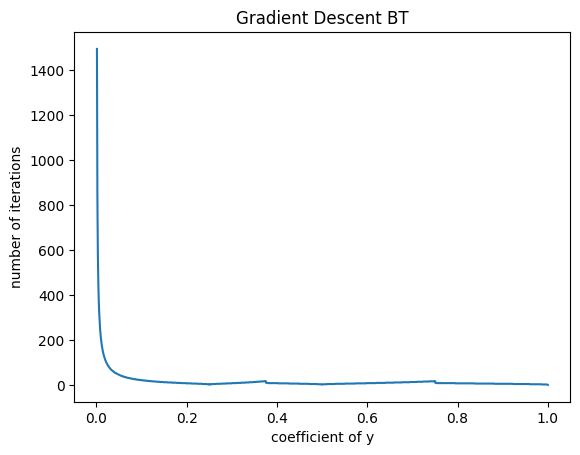

In [210]:
plt.plot(the_range, l)
plt.title("Gradient Descent BT")
plt.xlabel("coefficient of y")
plt.ylabel("number of iterations")
plt.show()

#### Effect of coefficient of y on Iteration Count

As it increases from 0.001 to 1, the following effects are observed:

- **Small**: The optimization process is dominated by slow convergence in the \( y \)-direction, resulting in a high number of iterations.
- **Moderate**: The curvature balance between the \( x \) and \( y \)-directions improves, leading to more efficient optimization and fewer iterations.
- **Large**: The curvature in both directions is well-balanced, further reducing the number of iterations required.

<hr>

<h3 style="color:#07ff00">Newton's Method</h3>

In [64]:
def hessian_calculator(coeffs):
    hess = np.zeros((2, 2))
    hess[0][0] = 2*coeffs[0]
    hess[1][1] = 2*coeffs[1]
    return hess

#### Parameters

- `coeffs`: Coefficients of the function \( f \).
- `x_0`: Initial guess for the parameters.
- `tolerance`: Convergence criterion based on the norm of the gradient.

#### Algorithm:

1. **Initialization**: Set iteration counter `iter` to 0. Compute the inverse of the Hessian matrix at the start, assuming it is constant.
2. **Convergence Check**: Continue iterating while the gradient norm is above the tolerance.
3. **Gradient Calculation**: Compute the gradient at the current \( x_0 \).
4. **Update Step**: Update \( x_0 \) using the pure Newton step: \( x_1 = x_0 - H^{-1} grad(f) \).
5. **Iteration**: Set \( x_0 \) to the new point \( x_1 \) and increment the iteration counter.

The function returns the optimized parameters and the number of iterations taken to converge.

In [160]:
def pure_newton(coeffs, x_0, tolerance):
    
    iter = 0
    hess_inv = np.linalg.inv(hessian_calculator(coeffs))
    while (np.linalg.norm(grad_calculator(coeffs, x_0)) >= tolerance):
        grad = grad_calculator(coeffs, x_0)
        x_1 = x_0 - hess_inv @ grad
        x_0 = x_1
        iter += 1

    return (np.array(x_0), iter)

In [143]:
COEFFS = (1, 2)
X_0 = (100, 0.01)
TOLERANCE = 0.00001

In [206]:
the_range = np.arange(0.001, 1.001, 0.001)
p = list()
for y_co in the_range:
    p.append(pure_newton((1, y_co), X_0, TOLERANCE)[1])

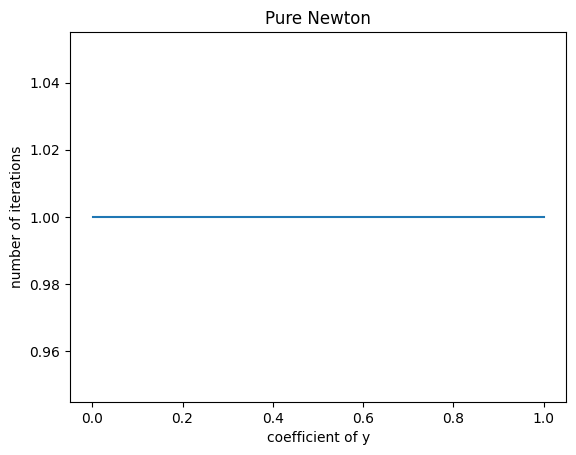

In [209]:
plt.plot(the_range, p)
plt.title("Pure Newton")
plt.xlabel("coefficient of y")
plt.ylabel("number of iterations")
plt.show()

The stability in the number of iterations arises because the pure Newton method is specifically well-suited for quadratic functions. It uses the exact curvature information (via the Hessian) to find the minimum in a single step. The coefficient of y affects the scale of the 𝑦-direction in the function but does not affect the efficiency of the method due to the precise correction applied by the inverse Hessian.